# MALDI acquisition of predefined **2D** areas

author: Alex Mattausch  
version: 0.1.0

In [15]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib.pyplot as plt
import remote_control.control as rc
import remote_control.utils as utils

#from IPython.display import set_matplotlib_formats
#set_matplotlib_formats('svg')

from remote_control import acquisition
from remote_control.control import configure_fly_at_fixed_z
from itertools import product

CONFIG_FN = 'remote_config.json'

### IN CASE OF ERROR, make sure Jupyter is set to use the "Python [conda env:maldi-control-notebooks]" kernel

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
qa = acquisition.EasyQueueAquisition(
    config_fn = CONFIG_FN, 
    datadir="./data" # will save spatial position file here
)

configure_fly_at_fixed_z(2000, 500) 

### 1. Define slide area

In [35]:
image_bounds = [
    [15000, -25000], # bottom-right
    [-15000, 25000], # top-left
] 

qa.set_image_bounds(image_bounds)

### 2. Calibrate using 3D coordinates

**Note:** at least 3 calibration coordinates are required!

In [85]:
cal_points = [
    (15000, -25000, 3000), # bottom-right
    (0, 0, 3250),
    (-15000, 25000, 3500), # top-left
] 

qa.calibrate(cal_points)

Fit r2 score: 1.000


### 2. Add acquisition areas

Run this cell to clear areas and start over:

In [73]:
qa.clear_areas()

In [74]:
qa.add_area(
    name="well_1", # <- Optional!
    xy=(-10649, -18704),
    width=2500,
    height=2500,
    step_size_x=500,
    step_size_y=500
)

AcquistionArea(name='well_1', res_x=5, res_y=5, n_acquisitions=25)

In [75]:
qa.add_area(
    name="well_2",
    xy=(-10729, -6580),
    width=2500,
    height=2500,
    step_size_x=25,
    step_size_y=25
)

AcquistionArea(name='well_2', res_x=100, res_y=100, n_acquisitions=10000)

In [76]:
qa.add_area(
    name="well_3",
    xy=(-10729, 22000),
    width=2500,
    height=1000,
    step_size_x=250,
    step_size_y=250
)

AcquistionArea(name='well_3', res_x=10, res_y=4, n_acquisitions=40)

In [77]:
qa.add_area(
    name="well_4",
    xy=(10729, -22000),
    width=2500,
    height=2500,
    step_size_x=250,
    step_size_y=250
)

AcquistionArea(name='well_4', res_x=10, res_y=10, n_acquisitions=100)

In [78]:
qa.add_area(
    name="big_area",
    xy=(0, 22000),
    width=15000,
    height=15000,
    step_size_x=500,
    step_size_y=500
)

AcquistionArea(name='big_area', res_x=30, res_y=30, n_acquisitions=900)

total areas: 5


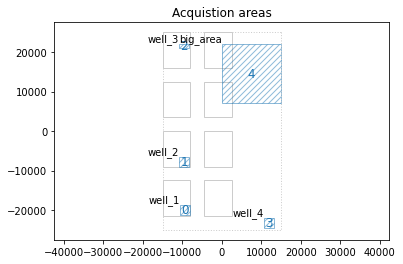

In [79]:
qa.plot_areas(plot_labtek_wells=True)

**NOTE:** numbers in boxes indicate acquisition order!

### 3. Generate measurement positions from areas

In [81]:
qa.generate_targets()

total pixels:  11065


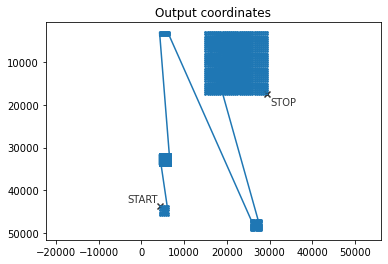

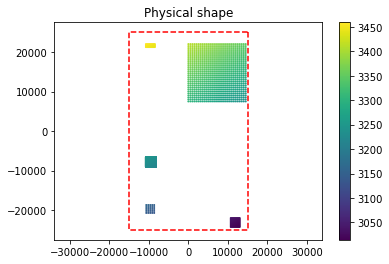

In [82]:
plt.close('all')
qa.plot_targets(annotate=True) 

### 4. Run acquistion

Once you are happy with plots above:
- Launch Telnet in apsmaldi software
- Press START on TUNE somputer
- Run the following cell

In [ ]:
filename = r"test" # Prefix for output files

qa.acquire(filename, dummy=True, measure=False)

In [122]:
# uncomment first!
# ga.acquire(filename, dummy=False, measure=True)

### 5. Cleanup
After imaging run the following cell to terminate Telnet

In [ ]:
utils.stop_telnet(CONFIG_FN)